* 1. Загрузить файл hr.csv.

* 2. Рассчитать основные статистики для переменных (среднее,медиана,мода,мин/макс,сред.отклонение).

* 3. Рассчитать и визуализировать корреляционную матрицу для переменных.

* 4. Визуализировать несколько взаимосвязей между переменными.

* 5. С использованием t-test статистики проверить взаимосвязи между несколькими переменными.

* 6. Рассчитать сколько работников работает в каждом департаменте.

* 7. Показать распределение сотрудников по зарплатам.

* 8. Показать распределение сотрудников по зарплатам совместно с департаментами.

* 9. Сколько сотрудников покинули компанию.

* 10. Проверить несколько гипотез для данных,чтобы понять почему сотрудники покидают компанию.

* 11. Загрузить результат (в формате .ipynbноутбука) в репозиторий. Разместить ссылку на репозиторийв лкна сайте

In [8]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns
%matplotlib inline
from pylab import rcParams
rcParams['figure.figsize'] = 12,9

In [128]:
df = pd.read_csv('/Users/peter/Downloads/итоговая_работа/HR.csv')
df.head(10)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
5,0.41,0.50,2,153,3,0,1,0,sales,low
6,0.10,0.77,6,247,4,0,1,0,sales,low
7,0.92,0.85,5,259,5,0,1,0,sales,low
8,0.89,1.00,5,224,5,0,1,0,sales,low
9,0.42,0.53,2,142,3,0,1,0,sales,low


### 2. Рассчитать основные статистики для переменных (среднее,медиана,мода,мин/макс,сред.отклонение).

In [6]:
df.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [15]:
df.mode()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.1,0.55,4.0,135,3.0,0.0,0.0,0.0,sales,low
1,NaN,NaN,NaN,156,NaN,NaN,NaN,NaN,NaN,NaN


In [201]:
#Тк в колонке salary представлены классы (номинативные данные), заменим их на дискретные для рассчета corr pearson 

level_map = {'low': 1, 'medium': 2, 'high': 3}
df['salary_int'] = df['salary'].map(level_map)
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary,salary_int
0,0.38,0.53,2,157,3,0,1,0,sales,low,1
1,0.80,0.86,5,262,6,0,1,0,sales,medium,2
2,0.11,0.88,7,272,4,0,1,0,sales,medium,2
3,0.72,0.87,5,223,5,0,1,0,sales,low,1
4,0.37,0.52,2,159,3,0,1,0,sales,low,1


### 3. Рассчитать и визуализировать корреляционную матрицу для переменных.

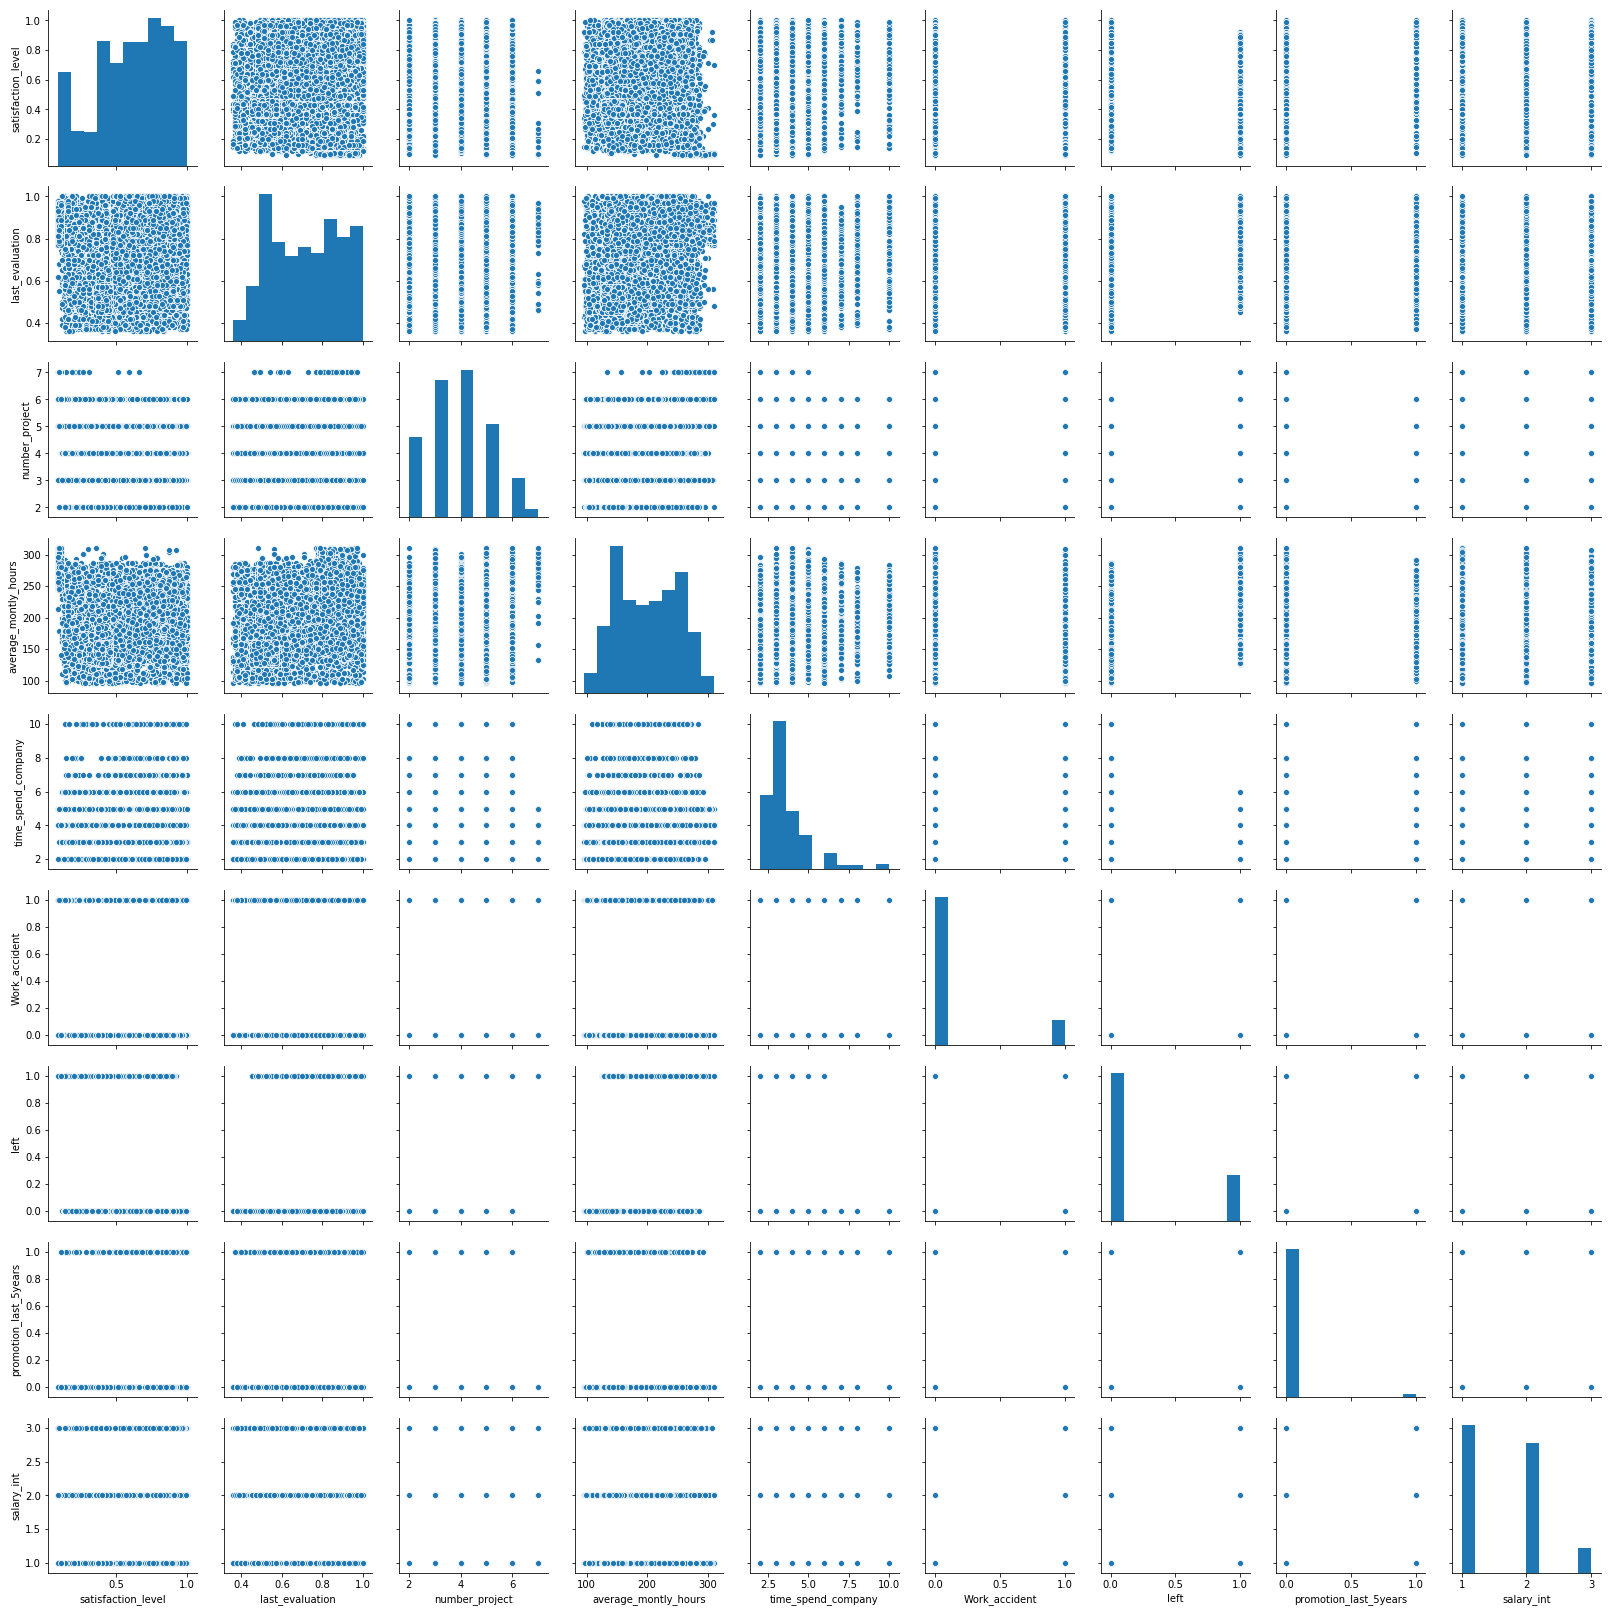

In [202]:
sns.pairplot(df)

In [19]:
df.corr()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
satisfaction_level,1.000000,0.105021,-0.142970,-0.020048,-0.100866,0.058697,-0.388375,0.025605
last_evaluation,0.105021,1.000000,0.349333,0.339742,0.131591,-0.007104,0.006567,-0.008684
number_project,-0.142970,0.349333,1.000000,0.417211,0.196786,-0.004741,0.023787,-0.006064
average_montly_hours,-0.020048,0.339742,0.417211,1.000000,0.127755,-0.010143,0.071287,-0.003544
time_spend_company,-0.100866,0.131591,0.196786,0.127755,1.000000,0.002120,0.144822,0.067433
Work_accident,0.058697,-0.007104,-0.004741,-0.010143,0.002120,1.000000,-0.154622,0.039245
left,-0.388375,0.006567,0.023787,0.071287,0.144822,-0.154622,1.000000,-0.061788
promotion_last_5years,0.025605,-0.008684,-0.006064,-0.003544,0.067433,0.039245,-0.061788,1.000000


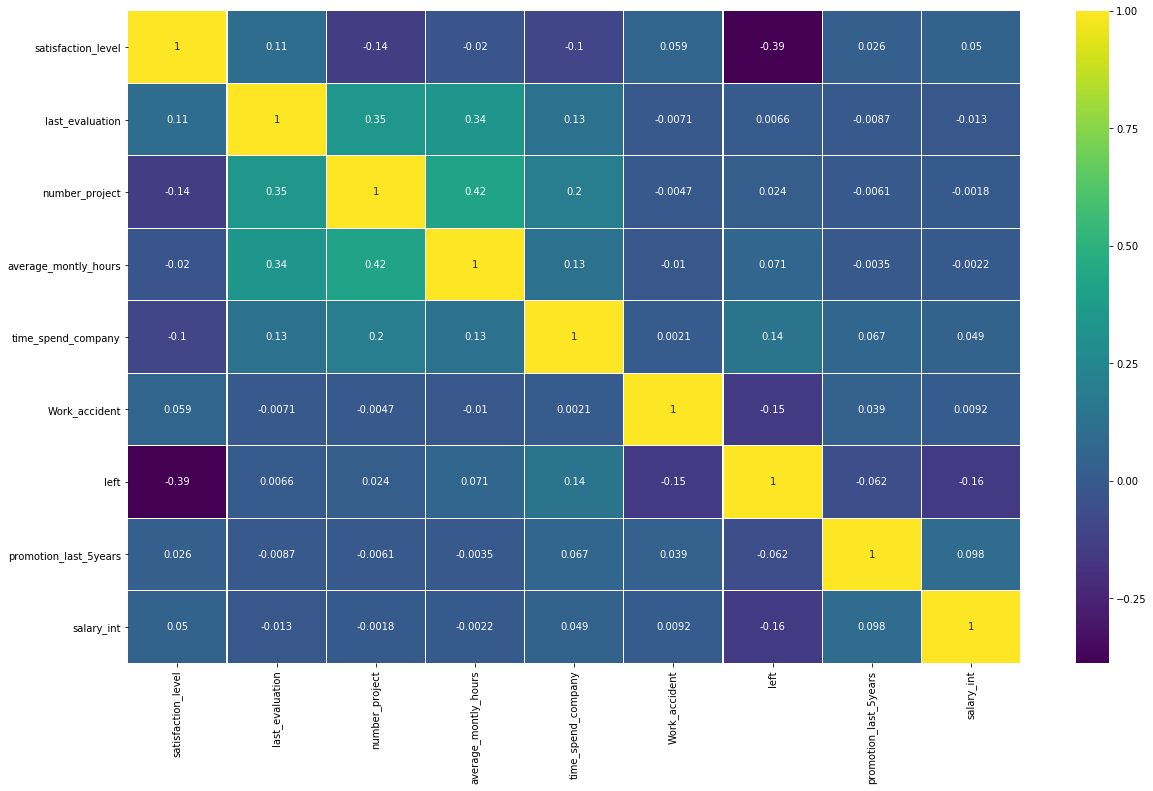

In [203]:
sns.heatmap(df.corr(),annot=True,cmap='viridis',linewidths=0.2)
fig=plt.gcf()
fig.set_size_inches(20,12)

### Наибольшую корреляцию имеют фичи:
#### * left & satisfaction_level
#### * number_project & average_montly_hours
#### * last_evaluation & average_montly_hours
#### * last_evaluation & number_project

### 4. Визуализировать несколько взаимосвязей между переменными.

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


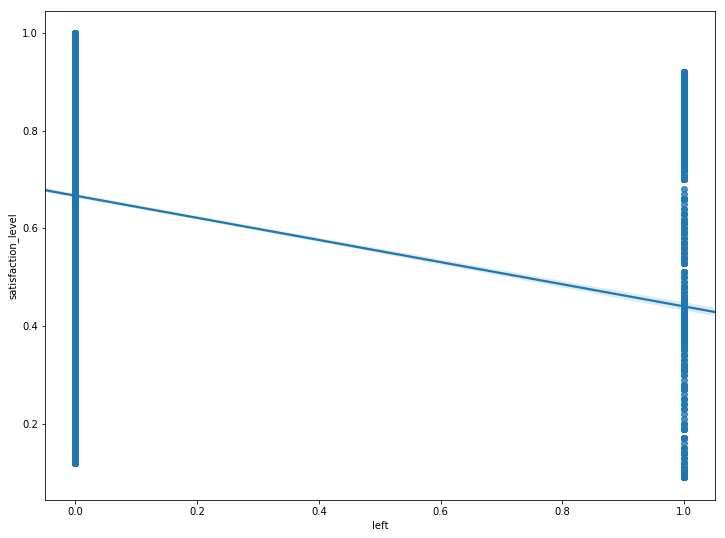

In [205]:
sns.regplot(x=df.left, y=df.satisfaction_level)

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


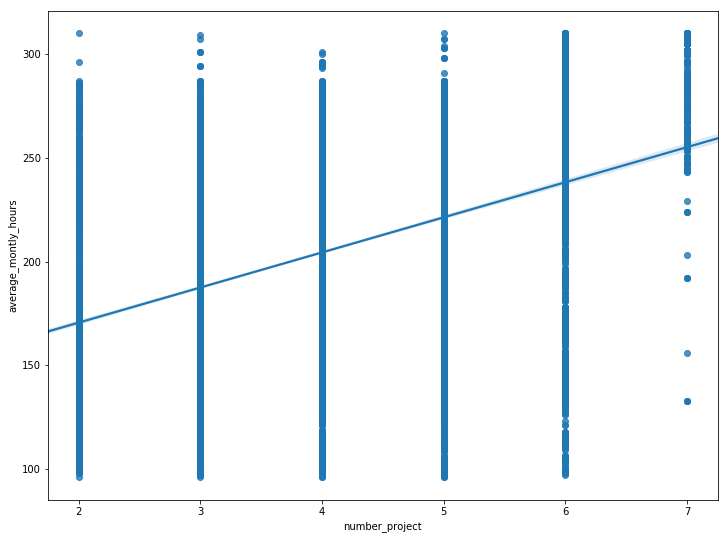

In [207]:
sns.regplot(x=df.number_project, y=df.average_montly_hours)

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


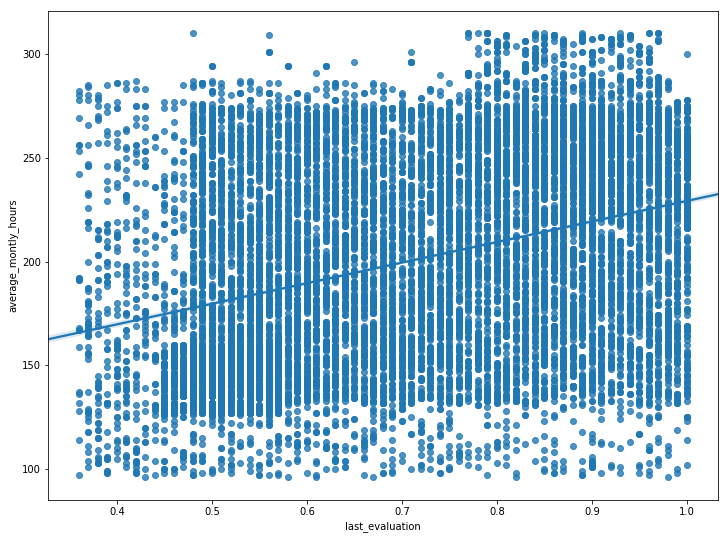

In [208]:
sns.regplot(x=df.last_evaluation, y=df.average_montly_hours)

### 5. С использованием t-test статистики проверить взаимосвязи между несколькими переменными.

### Проверим на достоверность найденные корреляции
#### H0 - корреляции нет
#### H1 - корреляция есть, двунапр альтернатива

In [211]:
from scipy import stats

In [219]:
pearson_coef, p_value = stats.pearsonr(df["left"], df["satisfaction_level"]) 
print("Pearson Correlation Coefficient: ", pearson_coef, "and a P-value of:", p_value)

Pearson Correlation Coefficient:  -0.3883749834241141 and a P-value of: 0.0


In [221]:
pearson_coef, p_value = stats.pearsonr(df["number_project"], df["average_montly_hours"]) 
print("Pearson Correlation Coefficient: ", pearson_coef, "and a P-value of:", p_value)

Pearson Correlation Coefficient:  0.417210634401777 and a P-value of: 0.0


In [222]:

pearson_coef, p_value = stats.pearsonr(df["last_evaluation"], df["average_montly_hours"]) 
print("Pearson Correlation Coefficient: ", pearson_coef, "and a P-value of:", p_value)

Pearson Correlation Coefficient:  0.33974179983835906 and a P-value of: 0.0


In [223]:

pearson_coef, p_value = stats.pearsonr(df["last_evaluation"], df["number_project"]) 
print("Pearson Correlation Coefficient: ", pearson_coef, "and a P-value of:", p_value)

Pearson Correlation Coefficient:  0.3493325885162623 and a P-value of: 0.0


#### *Все корреляции являются значимыми, нулевые гипотезы отклоняются.

### 6. Рассчитать сколько работников работает в каждом департаменте.

In [6]:
df2 = df.groupby('sales').count().iloc[:,:1].reset_index()
df2.columns = ['department','staff_count']
df2

,department,staff_count
0,IT,1227
1,RandD,787
2,accounting,767
3,hr,739
4,management,630
5,marketing,858
6,product_mng,902
7,sales,4140
8,support,2229
9,technical,2720


In [43]:
#Оставим только активных сотрудников
df22 = df[df.left == 0].groupby('sales').count().iloc[:,:1].reset_index()
df22.columns = ['department','staff_count']
df22

,department,staff_count
0,IT,954
1,RandD,666
2,accounting,563
3,hr,524
4,management,539
5,marketing,655
6,product_mng,704
7,sales,3126
8,support,1674
9,technical,2023


(array([   0.,  500., 1000., 1500., 2000., 2500., 3000., 3500.]),
 <a list of 8 Text yticklabel objects>)

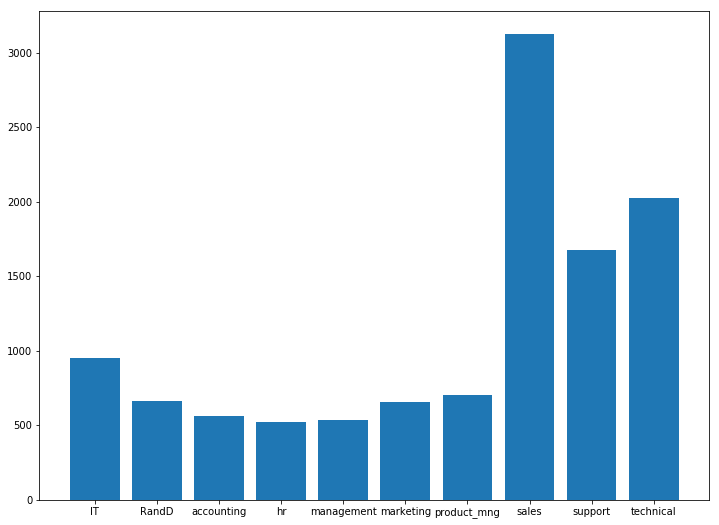

In [44]:
import matplotlib.pyplot as plt
height = df22.staff_count
bars = df22.department
y_pos = np.arange(len(bars))
plt.bar(y_pos, height)
plt.xticks(y_pos, bars, color='black')
plt.yticks(color='black')

### 7. Показать распределение сотрудников по зарплатам.

In [78]:
df3 = df.groupby(df['salary']) \
    .count() \
    .reset_index() \
    .iloc[:,:2] \
    .sort_values('satisfaction_level')
df3.head()

,salary,satisfaction_level
0,high,1237
2,medium,6446
1,low,7316


(array([   0., 1000., 2000., 3000., 4000., 5000., 6000., 7000., 8000.]),
 <a list of 9 Text yticklabel objects>)

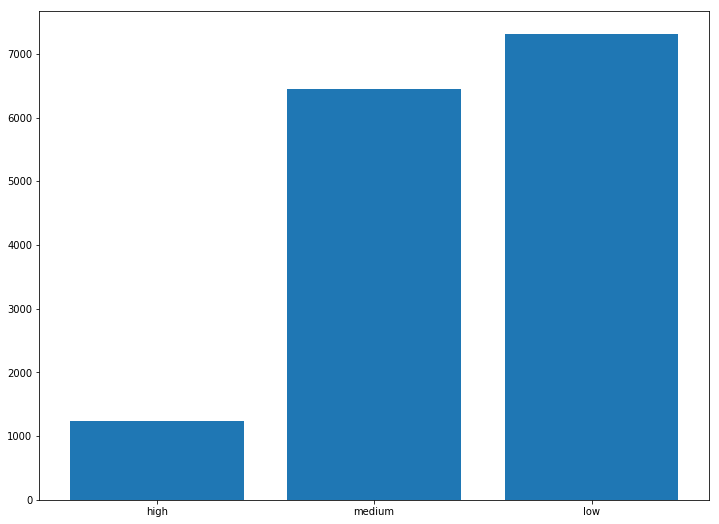

In [79]:
height = df3.satisfaction_level
bars = df3.salary
y_pos = np.arange(len(bars))
plt.bar(y_pos, height)
plt.xticks(y_pos, bars, color='black')
plt.yticks(color='black')

### 8. Показать распределение сотрудников по зарплатам совместно с департаментами.

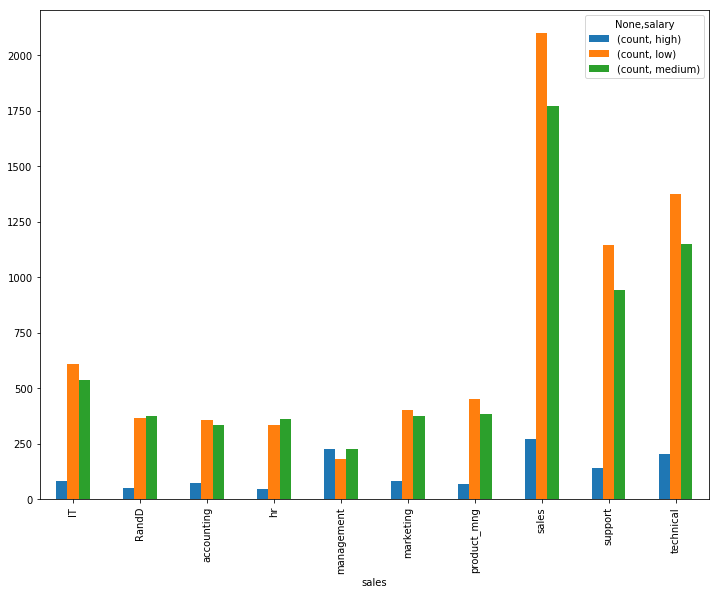

In [149]:
df4 = df.groupby(['sales','salary']) \
    .count() \
    .rename(columns={'satisfaction_level':'count'}) \
    .iloc[:,:1] \
    .unstack()

df4.plot(kind='bar')

In [150]:
df4 = df4.stack().reset_index()
df4.head()

,sales,salary,count
0,IT,high,83
1,IT,low,609
2,IT,medium,535
3,RandD,high,51
4,RandD,low,364


In [153]:
df4 = df4.rename(columns={'sales':'department'})
df4.head()

,department,salary,count
0,IT,high,83
1,IT,low,609
2,IT,medium,535
3,RandD,high,51
4,RandD,low,364


In [166]:
dfx = df4.merge(df22, on='department', how='outer')

In [167]:
dfx.head()

,department,salary,count,staff_count
0,IT,high,83,954
1,IT,low,609,954
2,IT,medium,535,954
3,RandD,high,51,666
4,RandD,low,364,666


In [168]:
dfx['percent'] = dfx['count']/dfx['staff_count']*100

In [169]:
dfx.drop(['count','staff_count'], axis =1, inplace = True)
dfx.head()

,department,salary,percent
0,IT,high,8.700210
1,IT,low,63.836478
2,IT,medium,56.079665
3,RandD,high,7.657658
4,RandD,low,54.654655


##### Отдел с самой высокой долей больших зарплат

In [198]:
dfx.query("salary == 'high'").sort_values('percent', ascending=False).head(1)

,department,salary,percent
12,management,high,41.74397


##### Отдел с самой высокой долей низких зарплат

In [200]:
dfx.query("salary == 'low'").sort_values('percent', ascending=False).head(1)

,department,salary,percent
25,support,low,68.458781


### 9. Сколько сотрудников покинули компанию.

In [121]:
print('Компанию покинуло', df[df.left == 1].count()[1],'сотрудников')

Компанию покинуло 3571 сотрудников


In [133]:
#Посмотрим где наибольшая текучка по отделам в процентном соотношении от кол-ва человек в отделе

df5 = df[df.left == 0].groupby('sales').count().iloc[:,:1].reset_index()
df5.columns=['sales','active_staff']
df5.head()

,sales,active_staff
0,IT,954
1,RandD,666
2,accounting,563
3,hr,524
4,management,539


In [99]:
df6 = df.groupby('sales').count().iloc[:,:1].reset_index()
df6.columns=['sales','all_staff']
df6.head()

,sales,all_staff
0,IT,1227
1,RandD,787
2,accounting,767
3,hr,739
4,management,630


In [100]:
joined = df5.merge(df6, on='sales', how='left')
joined.head()

,sales,active_staff,all_staff
0,IT,954,1227
1,RandD,666,787
2,accounting,563,767
3,hr,524,739
4,management,539,630


In [118]:
joined['percent_gone'] = (joined.all_staff-joined.active_staff)/joined.all_staff*100
joined = joined.sort_values('percent_gone')

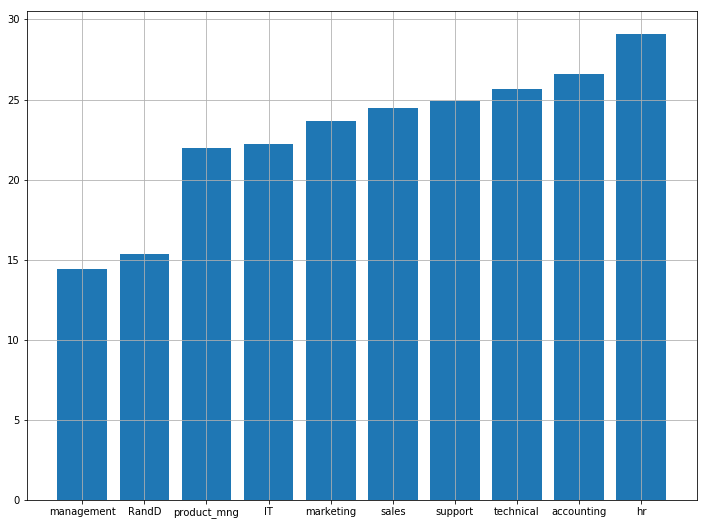

In [120]:
height = joined.percent_gone
bars = joined.sales
y_pos = np.arange(len(bars))
plt.bar(y_pos, height)
plt.xticks(y_pos, bars, color='black')
plt.yticks(color='black')
plt.grid()

#### Как ни странно, наибольший процент сотрудников, покинувших компанию, в отделе HR.
#### Наименьшая текучка в отделе менеджмента, это хорошо объясняет доля высоких зарплат